<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\HP\anaconda3\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\HP\AppData\Local\Temp\ipykernel_2208\1554170796.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [19]:
read_data= pd.read_csv('supermarket_sales.csv')

In [20]:
# simple Profile Review About Project
ProfileReport(read_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
read_data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [6]:
read_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
read_data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
read_data['Date']=pd.to_datetime(read_data['Date'])

In [10]:
read_data.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [11]:
read_data['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [12]:
read_data.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.131488e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


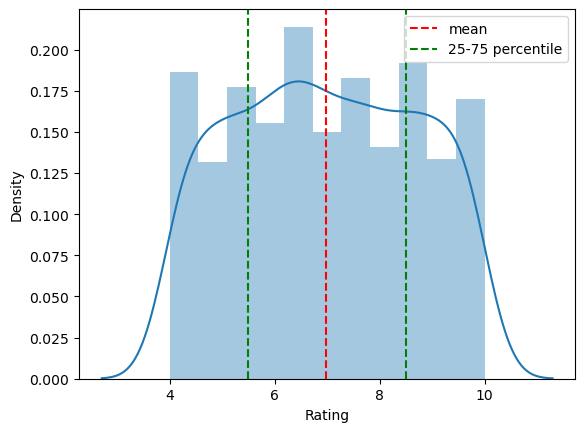

In [23]:
sns.distplot(read_data['Rating'])
plt.axvline(x=np.mean(read_data['Rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(read_data['Rating'],25),c='green',ls='--',label='25-75 percentile')
plt.axvline(x=np.percentile(read_data['Rating'],75),c='green',ls='--')
plt.legend()

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'cogs'}>],
       [<AxesSubplot:title={'center':'gross margin percentage'}>,
        <AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>]], dtype=object)

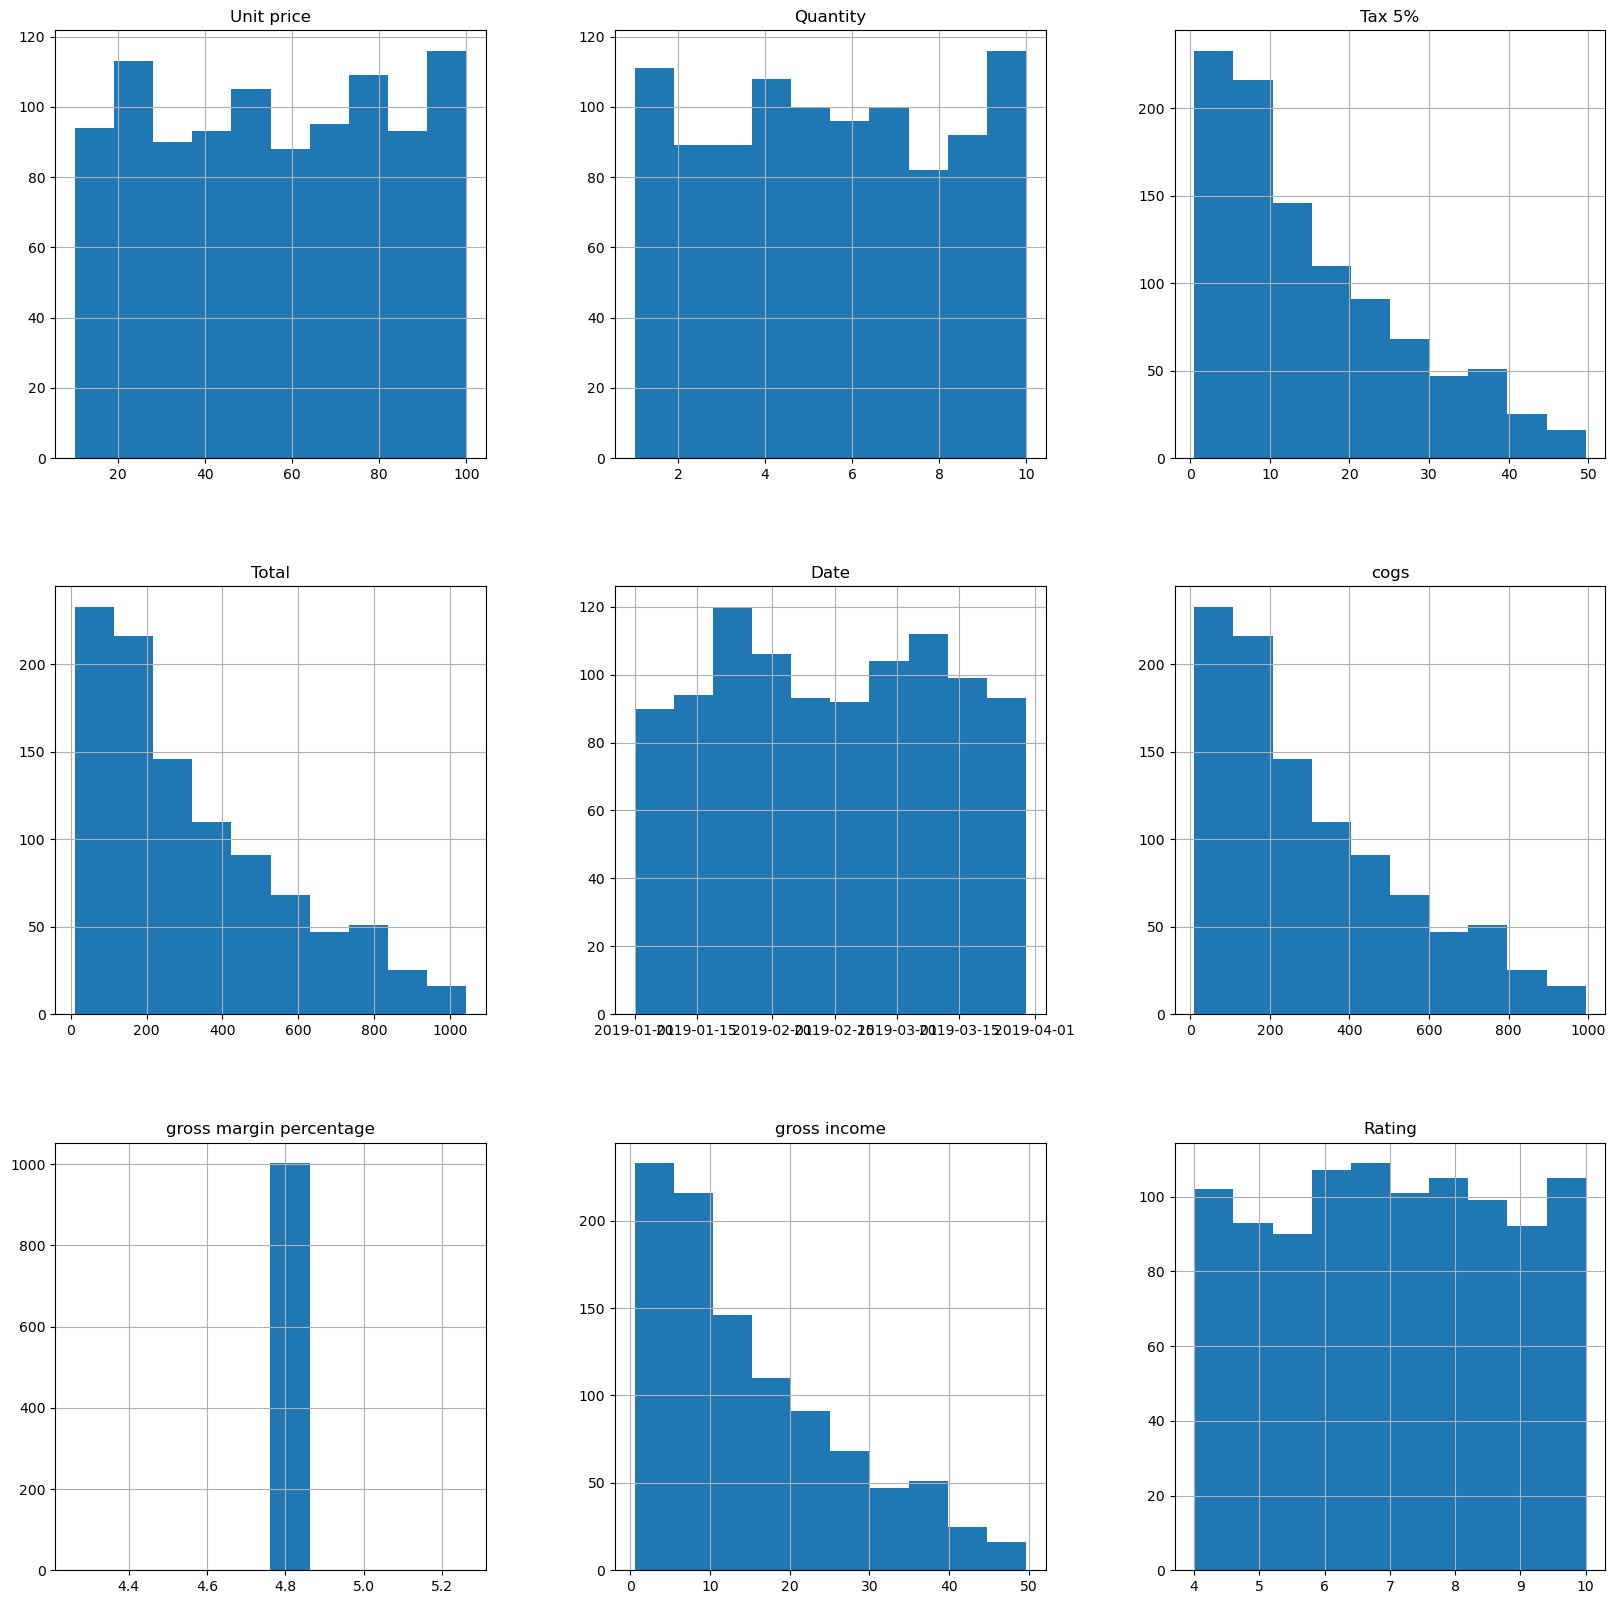

In [21]:
read_data.hist(figsize=(20,20))

**Question 2:** Do aggregate sales numbers differ by much between branches?

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

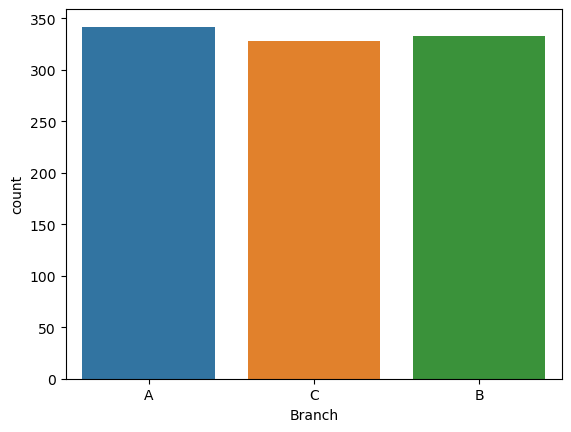

In [25]:
sns.countplot(read_data['Branch'])

In [27]:
read_data['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

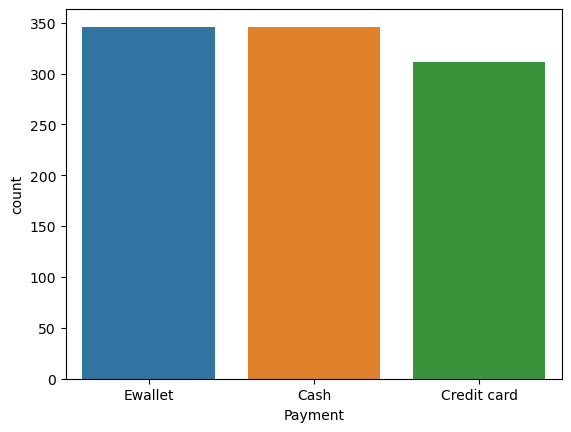

In [26]:
sns.countplot(read_data['Payment'])

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

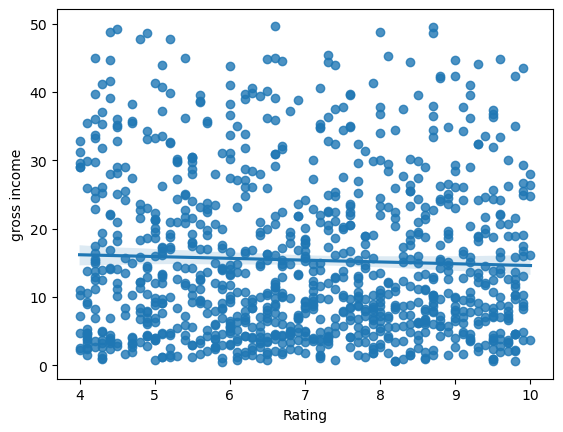

In [29]:
sns.regplot(read_data['Rating'],read_data['gross income'])

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

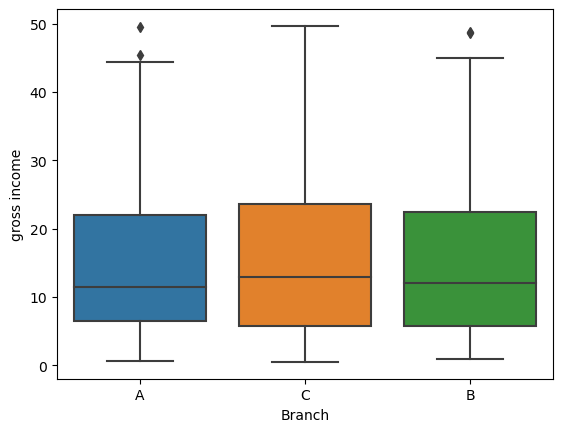

In [30]:
sns.boxplot(x=read_data['Branch'],y=read_data['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

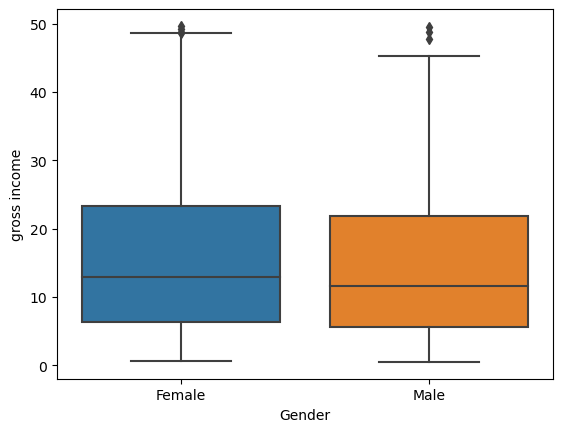

In [31]:
sns.boxplot(x=read_data['Gender'],y=read_data['gross income'])

**Question 4:** Is there a noticeable time trend in gross income?

<AxesSubplot:xlabel='Date', ylabel='gross income'>

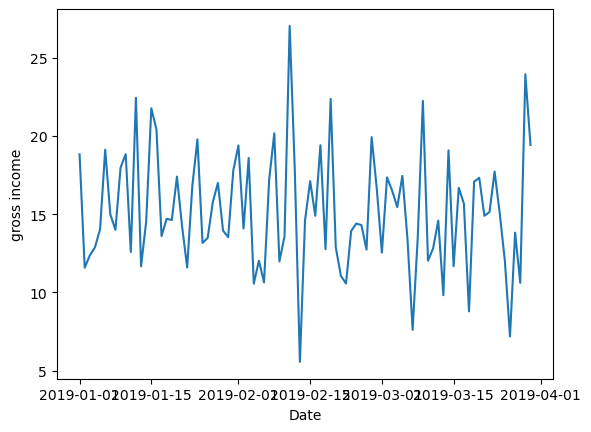

In [37]:
x=read_data.groupby(read_data['Date']).mean().index
y=read_data.groupby(read_data['Date']).mean()['gross income']
sns.lineplot(x=x,y=y)

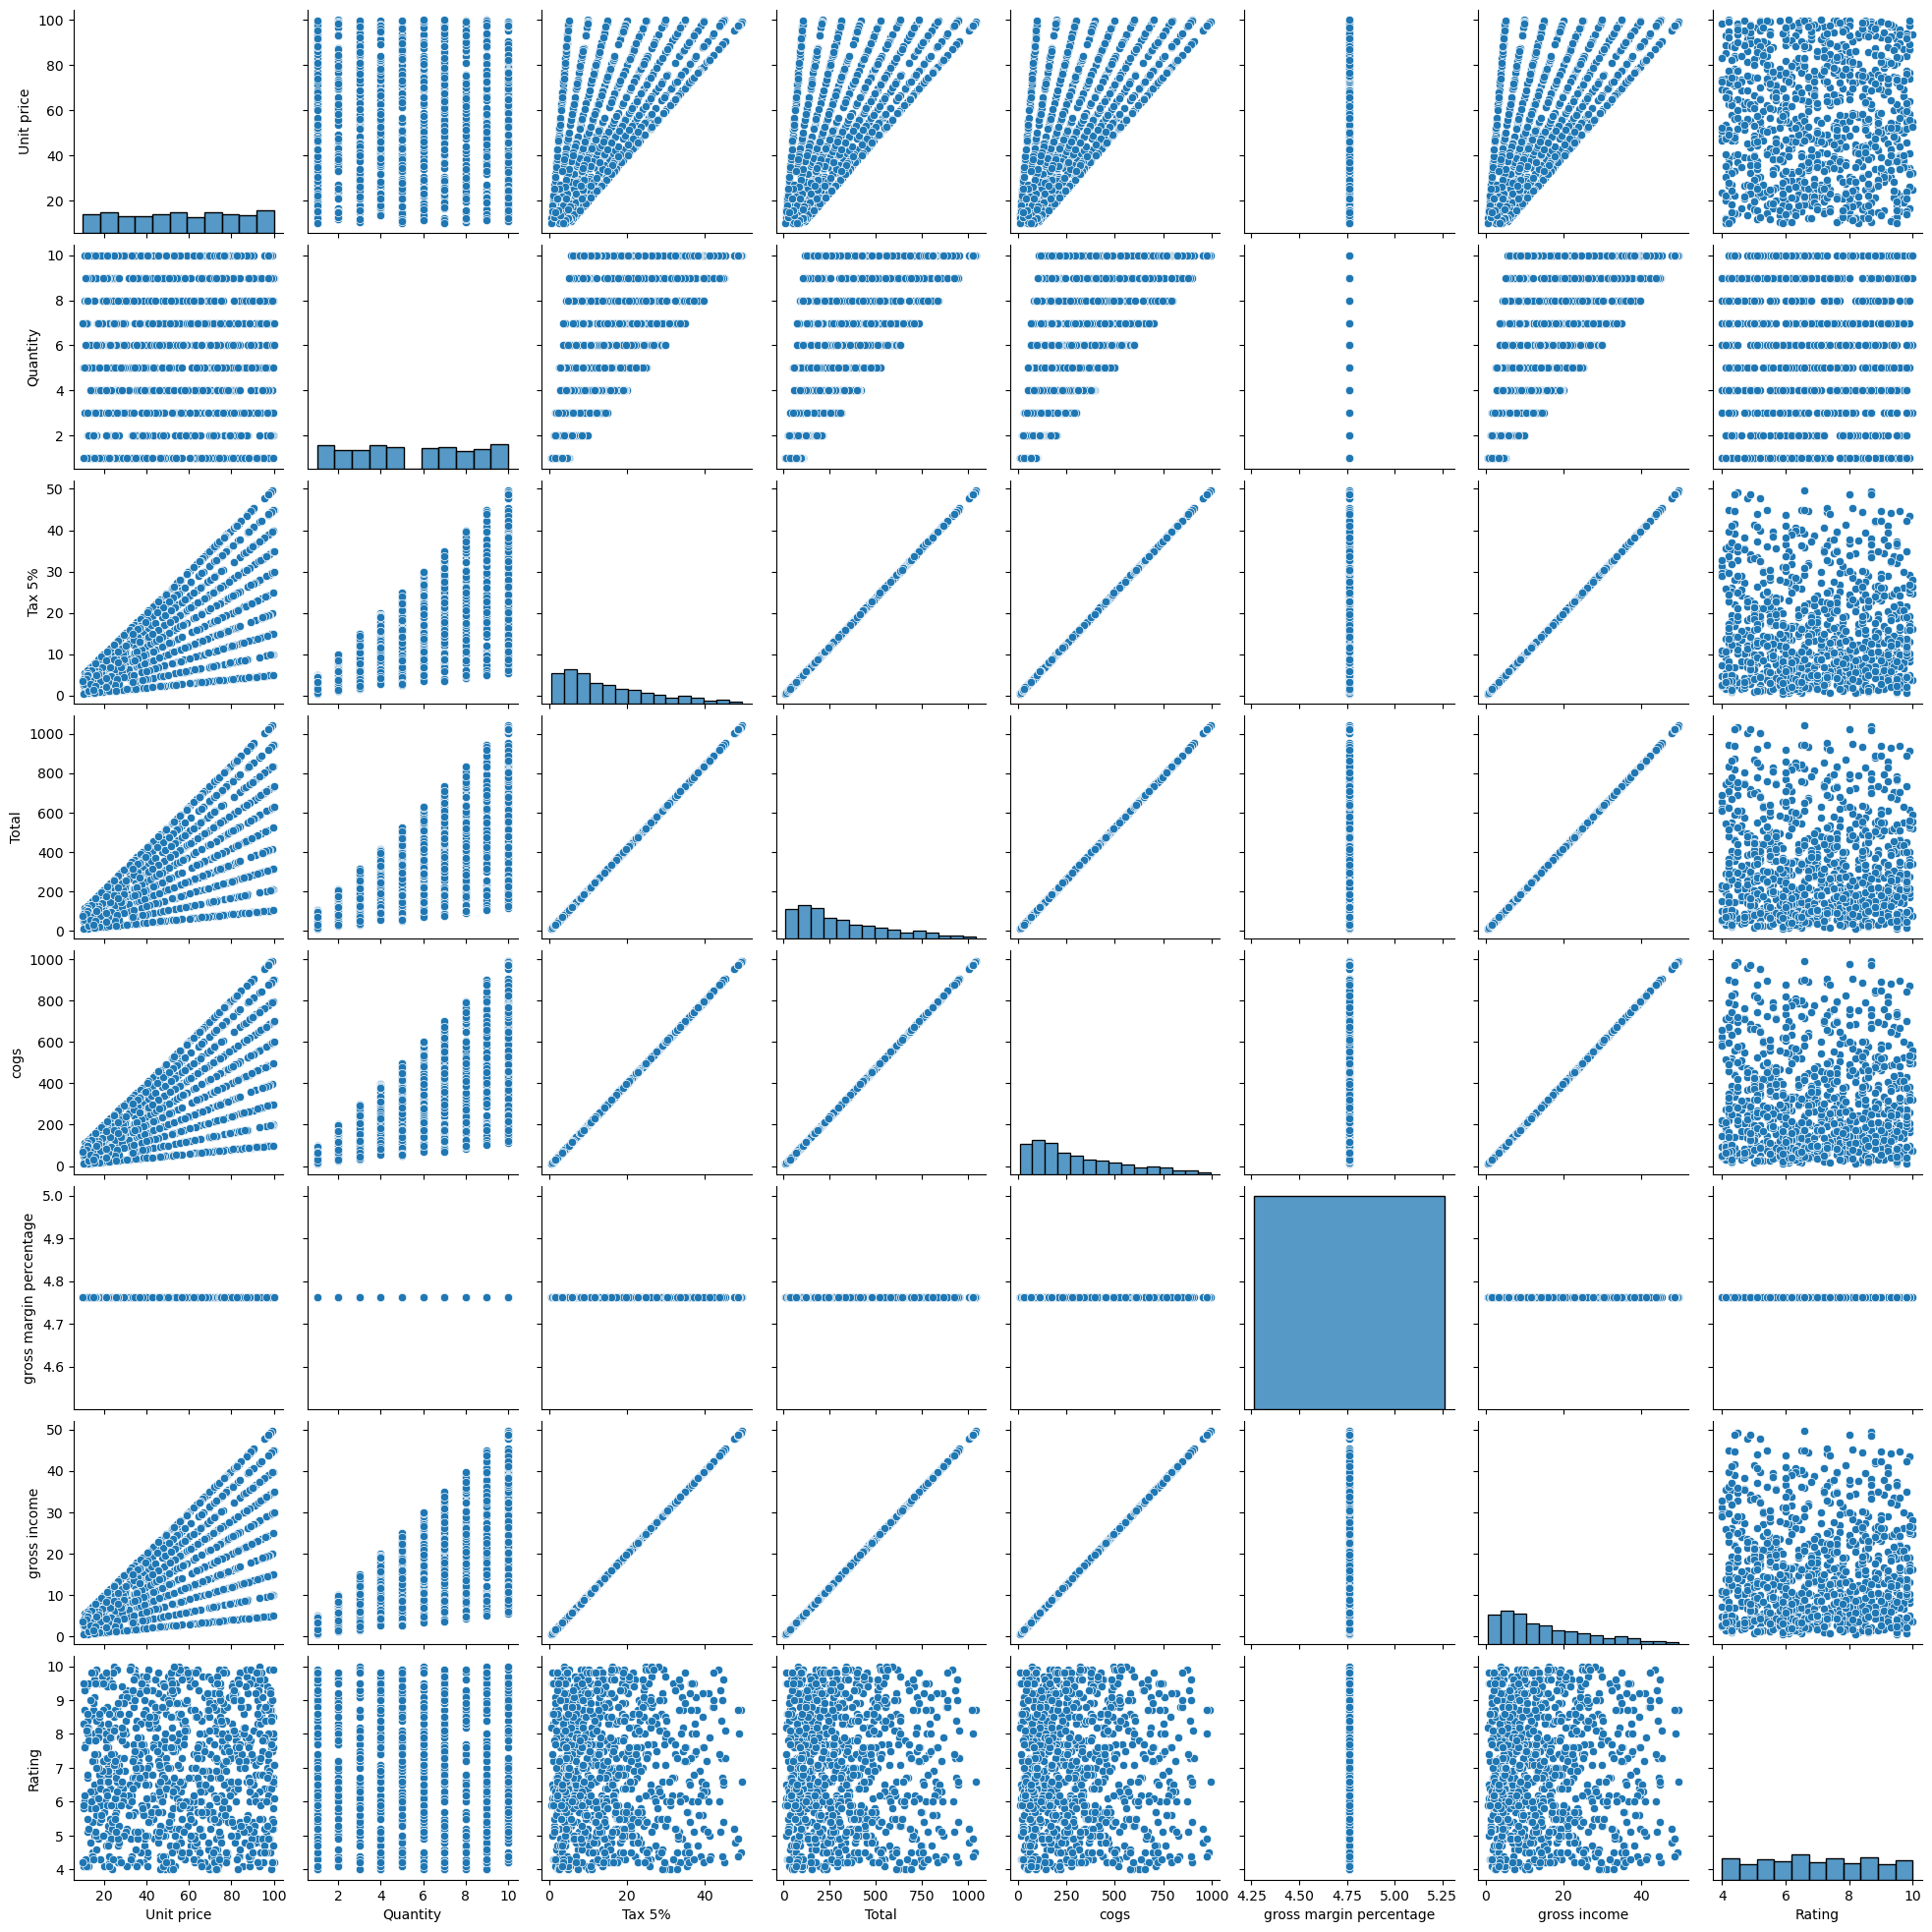

In [38]:
 sns.pairplot(read_data)

### Task 4: Dealing With Duplicate Rows and Missing Values

In [4]:
# Duplicated Rows
read_data.duplicated().sum()

3

In [5]:
read_data[read_data.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
1000  849-09-3807      A    Yangon        Member  Female   
1001  745-74-0715      A    Yangon        Normal    Male   
1002  452-04-8808      B  Mandalay        Normal    Male   

                Product line  Unit price  Quantity  Tax 5%    Total     Date  \
1000     Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1001  Electronic accessories         NaN       2.0   5.803  121.863  3/10/19   
1002  Electronic accessories       87.08       NaN  30.478  640.038  1/26/19   

       Time  Payment    cogs  gross margin percentage  gross income  Rating  
1000  13:28     Cash  618.38                 4.761905        30.919     6.6  
1001  20:46  Ewallet  116.06                 4.761905         5.803     8.8  
1002  15:17     Cash  609.56                 4.761905        30.478     5.5

In [7]:
 read_data.drop_duplicates(inplace=True)

In [8]:
# Missing Values
read_data.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

<AxesSubplot:>

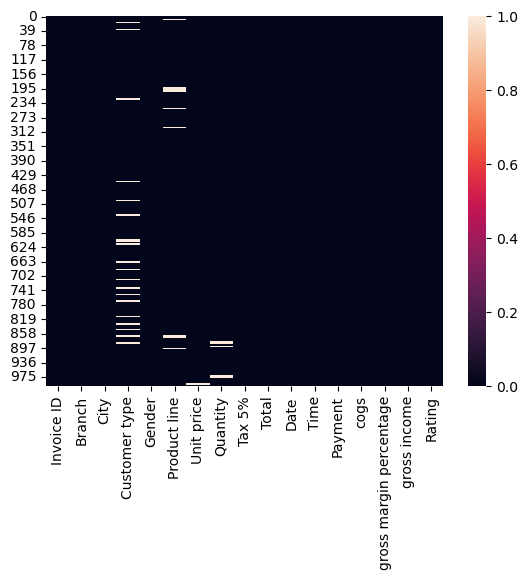

In [10]:
# Show Null Values
sns.heatmap(read_data.isnull())

In [13]:
# Only fill value unit_price and quantity column Because these column non categorical variable
read_data.fillna(read_data.mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2208\3118007084.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  read_data.fillna(read_data.mean(),inplace=True)


In [14]:
read_data.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [17]:
#  Now fill the categorical variable column Customer type and product line 
read_data.fillna(read_data.mode().iloc[0],inplace=True)

In [18]:
read_data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Task 5: Correlation Analysis

In [24]:
round(np.corrcoef(read_data['gross income'],read_data['Rating'])[1][0],2)

-0.04

In [26]:
np.round(read_data.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.02    0.63   0.63  0.63   
Quantity                       0.02      1.00    0.71   0.71  0.71   
Tax 5%                         0.63      0.71    1.00   1.00  1.00   
Total                          0.63      0.71    1.00   1.00  1.00   
cogs                           0.63      0.71    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.71    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.71   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<AxesSubplot:>

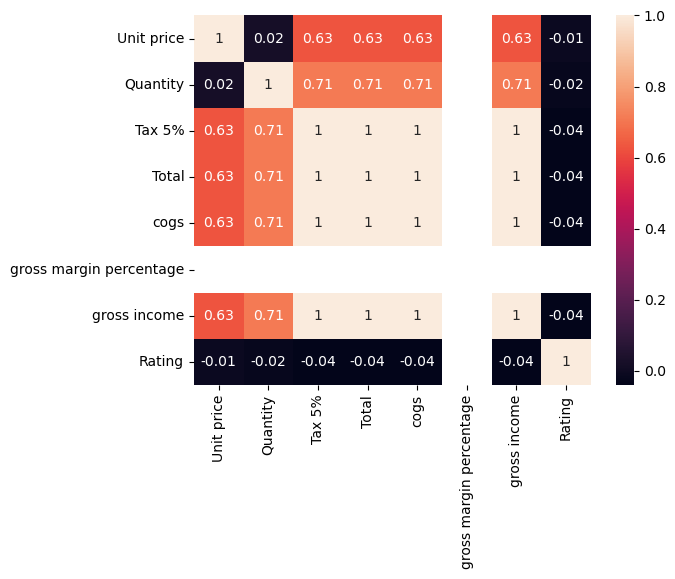

In [28]:
sns.heatmap(np.round(read_data.corr(),2),annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/